# Random forest for fraud data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
fraud_data = pd.read_csv("Fraud_check (1).csv")
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud_data.shape

(600, 6)

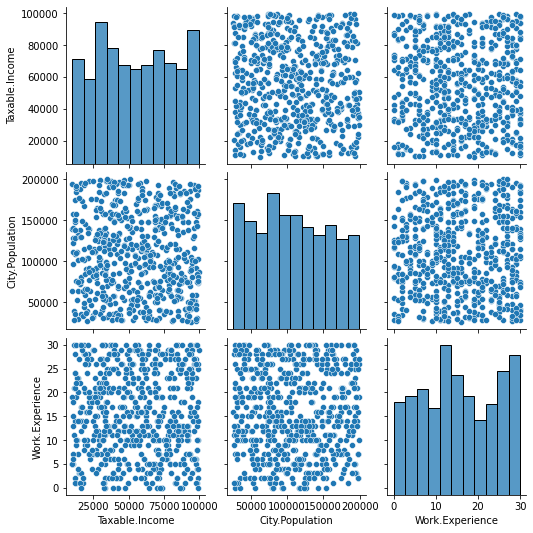

In [7]:
sns.pairplot(fraud_data)

In [8]:
# creating dummies of categirical column 

fraud_data1 = pd.get_dummies(fraud_data,columns=["Undergrad","Marital.Status","Urban"],drop_first=True)

In [9]:
fraud_data1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [10]:
fraud_data1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [11]:
fraud_data1.shape

(600, 7)

In [12]:
# creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for any good 

fraud_data1["TaxInc"]=pd.cut(fraud_data1["Taxable.Income"],bins= [10002,30000,99620],labels = ["Risky","Good"])

In [13]:
fraud_data1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [14]:
fraud_data1.tail()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good
599,96519,158137,16,0,0,0,0,Good


In [15]:
x = fraud_data1.iloc[:,1:7]
y = fraud_data1.iloc[:,7]

In [16]:
x.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [17]:
y.tail()

595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fraud_norm = scaler.fit_transform(x)

In [19]:
fraud_norm

array([[-1.17852072, -0.62914254, -1.040833  , -0.6912543 ,  1.32852435,
         0.99335541],
       [ 0.50850002,  0.27636996,  0.96076892, -0.6912543 , -0.75271484,
         0.99335541],
       [ 1.03310911,  1.63463872, -1.040833  ,  1.4466456 , -0.75271484,
         0.99335541],
       ...,
       [ 0.90969648, -1.76103318, -1.040833  , -0.6912543 , -0.75271484,
         0.99335541],
       [ 1.43219749,  0.1631809 ,  0.96076892,  1.4466456 , -0.75271484,
        -1.00668904],
       [ 0.9915901 ,  0.04999184, -1.040833  , -0.6912543 , -0.75271484,
        -1.00668904]])

# Random Forest

In [20]:
num_trees = 100
max_features =4
kfold = KFold(n_splits=10,random_state = 7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result = cross_val_score(model,x,y,cv=kfold)
print(result.mean()*100)

73.50000000000001


In [21]:
#changing same values 

nu_trees = 200
max_features = 5
kfold = KFold(n_splits=10,random_state=10,shuffle = True)
model_1 = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result_1=cross_val_score(model_1,x,y,cv=kfold)
print(result_1.mean()*100)

72.66666666666667


# using Anaother Methoed _Bagging

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
kfold = KFold(n_splits = 10,random_state=7,shuffle=True)
cart = DecisionTreeClassifier()
num_trees =100
model_2 =BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=7)
result_2 = cross_val_score(model_2,x,y,cv=kfold)
print(result_2.mean()*100)

74.66666666666667


# Boosting

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
model_3 = AdaBoostClassifier(n_estimators=100,random_state=7)
results_3 =cross_val_score(model_3,x,y,cv=kfold)
print(results_3.mean()*100)

77.5


# Random Forest for company data Q2

In [26]:
company_data = pd.read_csv("Company_Data (1).csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [27]:
company_data.shape

(400, 11)

In [28]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [29]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [30]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


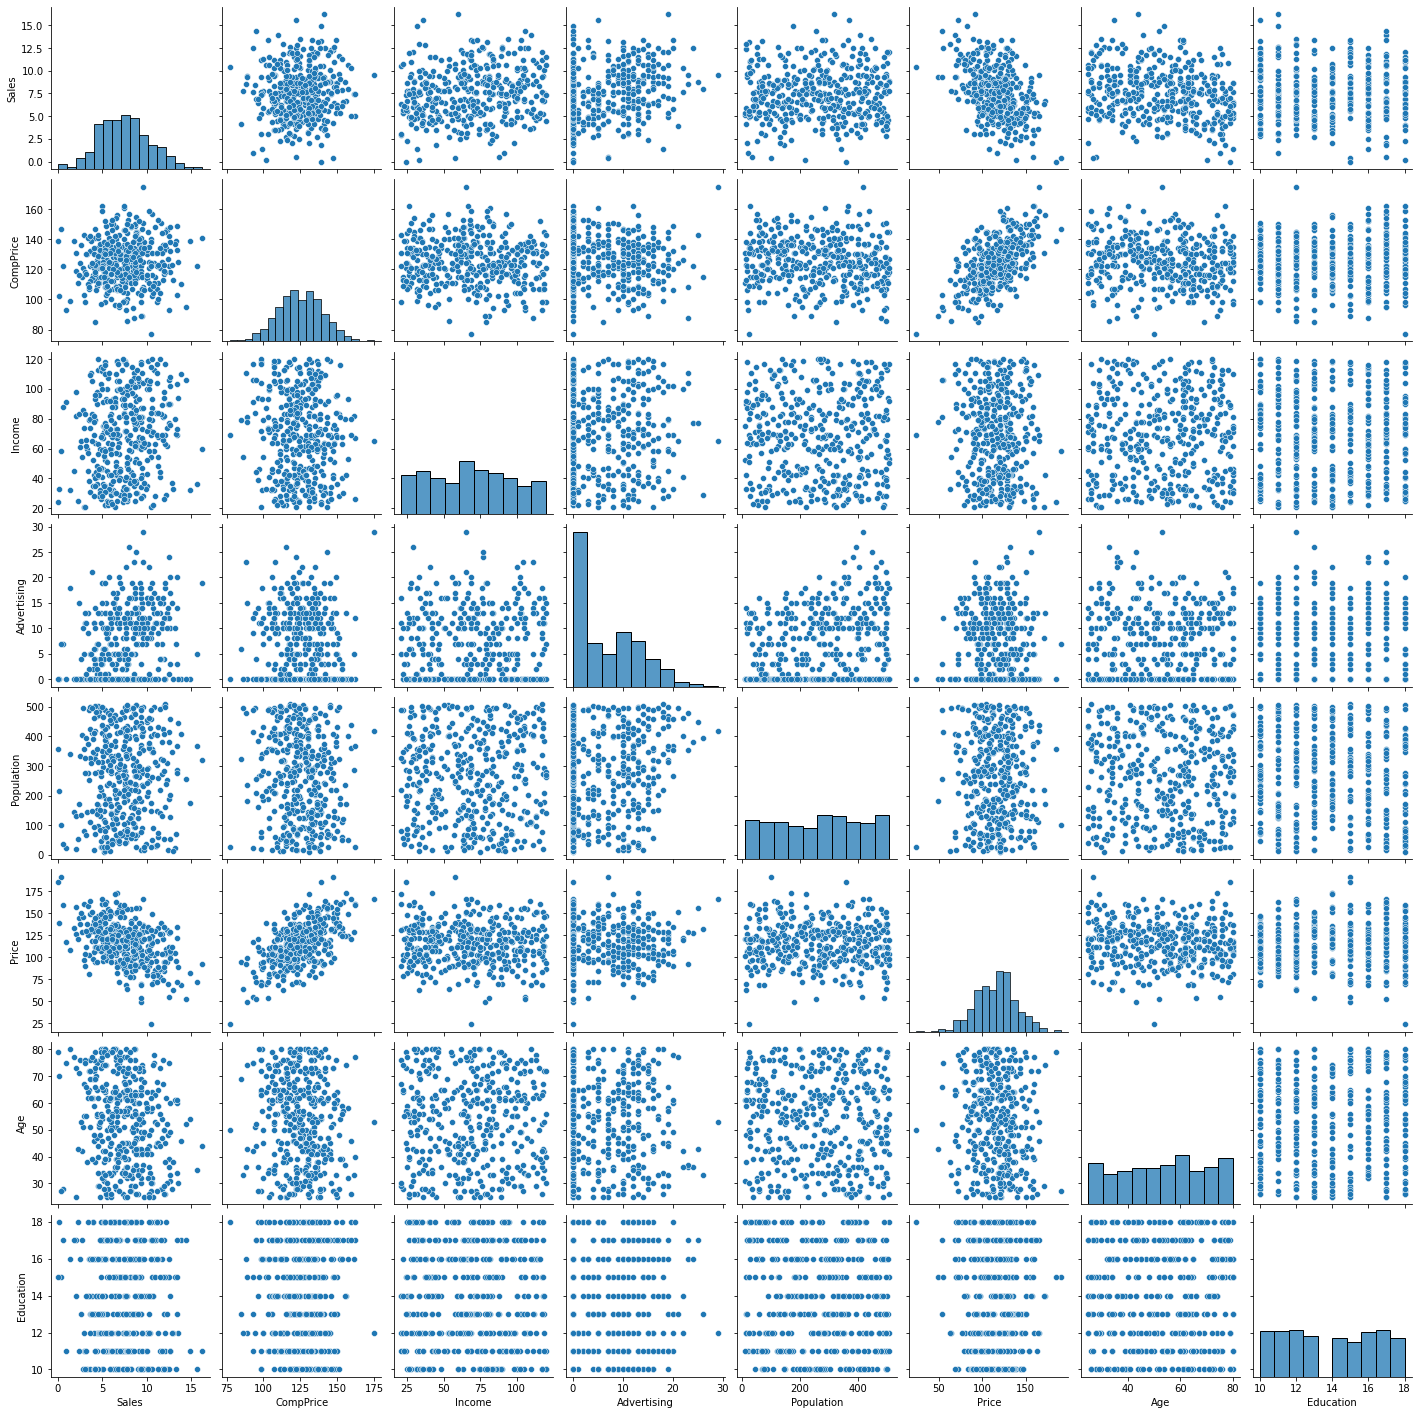

In [31]:
sns.pairplot(company_data)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder = LabelEncoder()

In [34]:
company_data.iloc[:,6] = labelencoder.fit_transform(company_data.iloc[:,6])

In [35]:
company_data.iloc[:,9] = labelencoder.fit_transform(company_data.iloc[:,9])

In [36]:
company_data.iloc[:,10] = labelencoder.fit_transform(company_data.iloc[:,10])

In [37]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [60]:
# lets assume: sales <= 7.49 as "low and other are "high"

sales_val=[]
for value in company_data["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
 
company_data["sales_val"]=sales_val

In [61]:
        
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,0,42,17,1,1,high
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low


In [62]:
company_data.sales_val.value_counts()

low     201
high    199
Name: sales_val, dtype: int64

In [67]:
x = company_data.drop(["sales_val","Sales"],axis=1)
y = company_data["sales_val"]

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [69]:
x

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  1.18444912,
         0.64686916,  0.74188112],
       [-0.91248434, -0.73906037,  1.40995711, ..., -1.4901134 ,
         0.64686916,  0.74188112],
       [-0.78189624, -1.20415947,  0.506621  , ..., -0.72595268,
         0.64686916,  0.74188112],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  1.56652948,
         0.64686916,  0.74188112],
       [-1.63071888,  0.37002211,  0.05495295, ..., -0.72595268,
         0.64686916,  0.74188112],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.80236876,
         0.64686916,  0.74188112]])

# Random forest classification 

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [77]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10,random_state=7,shuffle=True)
model1 = RandomForestClassifier(n_estimators=num_trees,max_features = max_features)
result1 = cross_val_score(model1,x,y,cv=kfold)
print(result1.mean()*100)

79.24999999999999


In [81]:
#changing some values of trees and features
num_trees1 = 300
max_features1=5
kfold = KFold(n_splits=7,random_state=14,shuffle=True)
model2 = RandomForestClassifier(n_estimators=num_trees1,max_features=max_features1)
result2 = cross_val_score(model1,x,y,cv=kfold)
print(result1.mean()*100)

79.24999999999999


# using anather methoed 

In [82]:
num_trees = 100
max_features=4
kfold = KFold(n_splits=10,random_state=7,shuffle=True)

# boosting

In [84]:
from sklearn.ensemble import AdaBoostClassifier


In [85]:
model4 = AdaBoostClassifier(n_estimators = num_trees, random_state=7)
results4 = cross_val_score(model4,x,y,cv=kfold)
print(results4.mean()*100)

85.50000000000001
